In [3]:
import pandas as pd
import re
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('/home/corolo/Desktop/analysisAvito/data/avito_data.csv')

In [5]:
data

,Unnamed: 0,title,price,city,datetime,nb_rooms,nb_baths,surface_area,equipement,link
0,0,CMN-MA-1641 - Appartement à vendre à Val Fleurie,1 600 000 DH,Casablanca,"11/6/2024, 12:12:49 PM",3.0,1,132,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/val_fleuri/appartement...
1,1,Appartement à vendre 125 m² à Casablanca,9 900 DH,Casablanca,"11/6/2024, 12:12:26 PM",2.0,2,125,"Balcon, Climatisation, Cuisine Équipée, Parkin...",https://www.avito.ma/fr/autre_secteur/appartem...
2,2,CMN-MA-1787 - Appartement à vendre à Les Hôpitaux,2 300 000 DH,Casablanca,"11/6/2024, 12:10:48 PM",3.0,2,233,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/quartier_des_h%C3%B4pi...
3,3,Appartement à vendre 3 chambres Salon à Casa,PRIX NON SPÉCIFIÉ,Casablanca,"11/6/2024, 12:10:57 PM",NaN,NaN,NaN,NaN,https://www.avito.ma/fr/ain_sebaa/appartements...
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://immoneuf.avito.ma/fr/unite/l53?utm_sou...
...,...,...,...,...,...,...,...,...,...,...
1755,1755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,https://immoneuf.avito.ma/fr/unite/job?utm_sou...
1756,1756,CMN-AN-1524 - Appartement à vendre à Racine,3 300 000 DH,Casablanca,"9/17/2024, 10:44:45 AM",3.0,2,154,"Ascenseur, Parking",https://www.avito.ma/fr/racine/appartements/CM...
1757,1757,CMN-AC-1776 - Appartement à vendre à Californie,3 500 000 DH,Casablanca,"9/17/2024, 10:26:48 AM",3.0,2,170,"Ascenseur, Balcon, Parking, Terrasse",https://www.avito.ma/fr/californie/appartement...
1758,1758,Bel Appartement à vendre 117 m² à Casablanca,990 000 DH,Casablanca,"9/17/2024, 10:08:29 AM",2.0,2,117,"Ascenseur, Balcon, Parking, Sécurité",https://www.avito.ma/fr/ain_sebaa/appartements...


In [6]:
data.describe()

,Unnamed: 0,nb_rooms
count,1760.000000,1193.000000
mean,879.500000,2.393965
std,508.212554,0.746826
min,0.000000,1.000000
25%,439.750000,2.000000
50%,879.500000,2.000000
75%,1319.250000,3.000000
max,1759.000000,7.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1760 non-null   int64  
 1   title         1400 non-null   object 
 2   price         1400 non-null   object 
 3   city          1400 non-null   object 
 4   datetime      1394 non-null   object 
 5   nb_rooms      1193 non-null   float64
 6   nb_baths      1181 non-null   object 
 7   surface_area  990 non-null    object 
 8   equipement    868 non-null    object 
 9   link          1760 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 137.6+ KB


/tmp/ipykernel_19768/3994595786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values, palette="viridis")


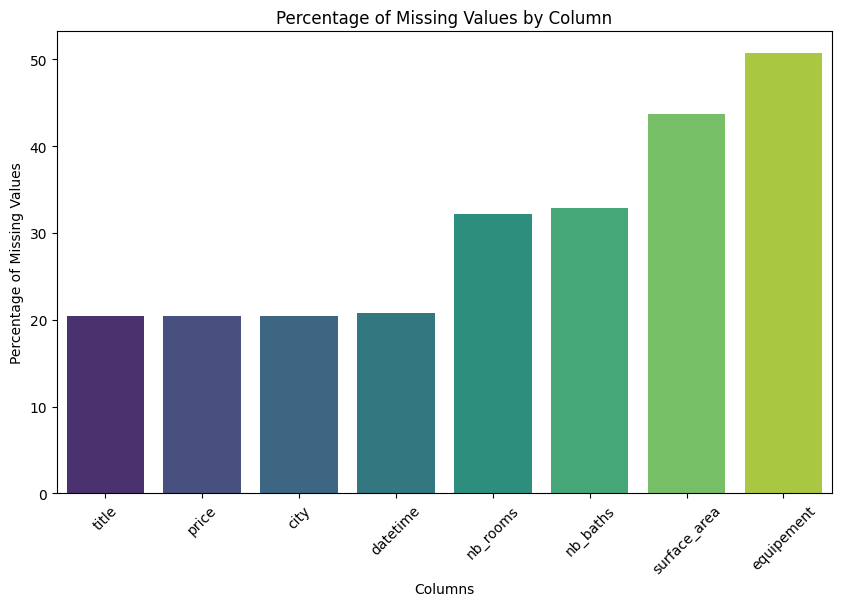

In [8]:
# Step 1: Initial Overview of Missing Values
# Display missing values before any cleaning (Visualize percentage of missing values)
missing_values_percentage = (data.isnull().sum() / len(data)) * 100
missing_values_percentage = missing_values_percentage[missing_values_percentage > 0]

plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values_percentage.index, y=missing_values_percentage.values, palette="viridis")
plt.title("Percentage of Missing Values by Column")
plt.xlabel("Columns")
plt.ylabel("Percentage of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [9]:
# Step 2: Clean 'price' Column and Visualize Before/After Cleaning
# Define function to clean the 'price' column
def clean_price(price):
    if isinstance(price, str):
        price = re.sub(r'[^\d,]', '', price)
        price = price.replace(',', '')
        try:
            return float(price)
        except ValueError:
            return None
    return price

In [10]:
# Apply function to clean 'price' and store in new column
data['price_cleaned'] = data['price'].apply(clean_price)

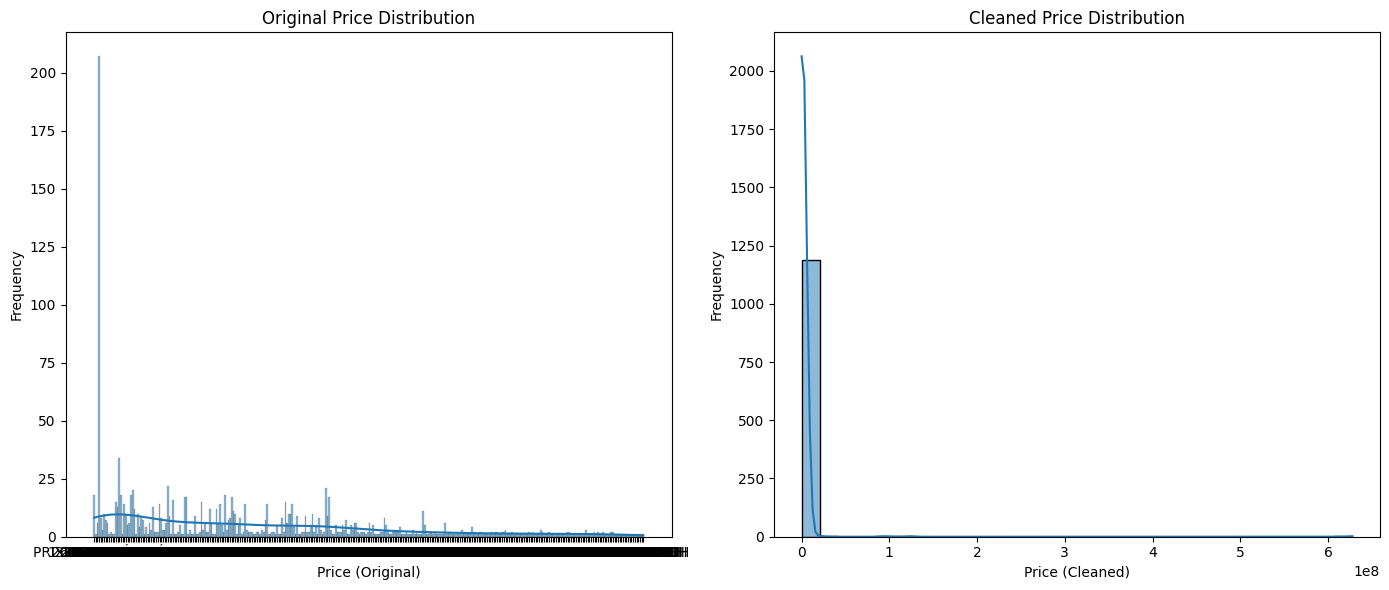

In [11]:
# Visualize the distribution of 'price' before and after cleaning
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.histplot(data['price'].dropna(), bins=30, kde=True, ax=axes[0])
axes[0].set_title("Original Price Distribution")
axes[0].set_xlabel("Price (Original)")
axes[0].set_ylabel("Frequency")

sns.histplot(data['price_cleaned'], bins=30, kde=True, ax=axes[1])
axes[1].set_title("Cleaned Price Distribution")
axes[1].set_xlabel("Price (Cleaned)")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

In [12]:
# Step 3: Fill Missing Values for 'type_de_vente' Based on 'title' Keywords
# Define function to infer 'type_de_vente' based on title content
def infer_type_de_vente(title, current_type):
    if pd.isnull(current_type):
        if any(keyword in str(title).lower() for keyword in ["louer", "loué", "location"]):
            return "louer"
    return current_type

In [13]:
# Apply function to fill missing values in 'type_de_vente' and fill remaining with 'louer'
data['type_de_vente'] = data.apply(lambda row: infer_type_de_vente(row['title'], row.get('type_de_vente', None)), axis=1)
data['type_de_vente'].fillna('louer', inplace=True)

/tmp/ipykernel_19768/3035861990.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['type_de_vente'].fillna('louer', inplace=True)


In [14]:
# Step 4: Impute Missing Values in Other Columns ('nb_rooms', 'nb_baths', 'surface_area')
# Convert and clean relevant columns, then use median to fill missing values
data['nb_baths'] = pd.to_numeric(data['nb_baths'], errors='coerce')
data['nb_rooms'].fillna(data['nb_rooms'].median(), inplace=True)
data['nb_baths'].fillna(data['nb_baths'].median(), inplace=True)
data['surface_area'] = pd.to_numeric(data['surface_area'], errors='coerce')
data['surface_area'].fillna(data['surface_area'].median(), inplace=True)

/tmp/ipykernel_19768/1654370518.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['nb_rooms'].fillna(data['nb_rooms'].median(), inplace=True)
/tmp/ipykernel_19768/1654370518.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [15]:
# Step 5: Outlier Detection and Capping
# Cap extreme values in 'price_cleaned', 'nb_rooms', 'nb_baths', 'surface_area' at 99th percentile
for col in ['price_cleaned', 'nb_rooms', 'nb_baths', 'surface_area']:
    cap = data[col].quantile(0.99)
    data[col] = data[col].apply(lambda x: min(x, cap) if pd.notnull(x) else x)

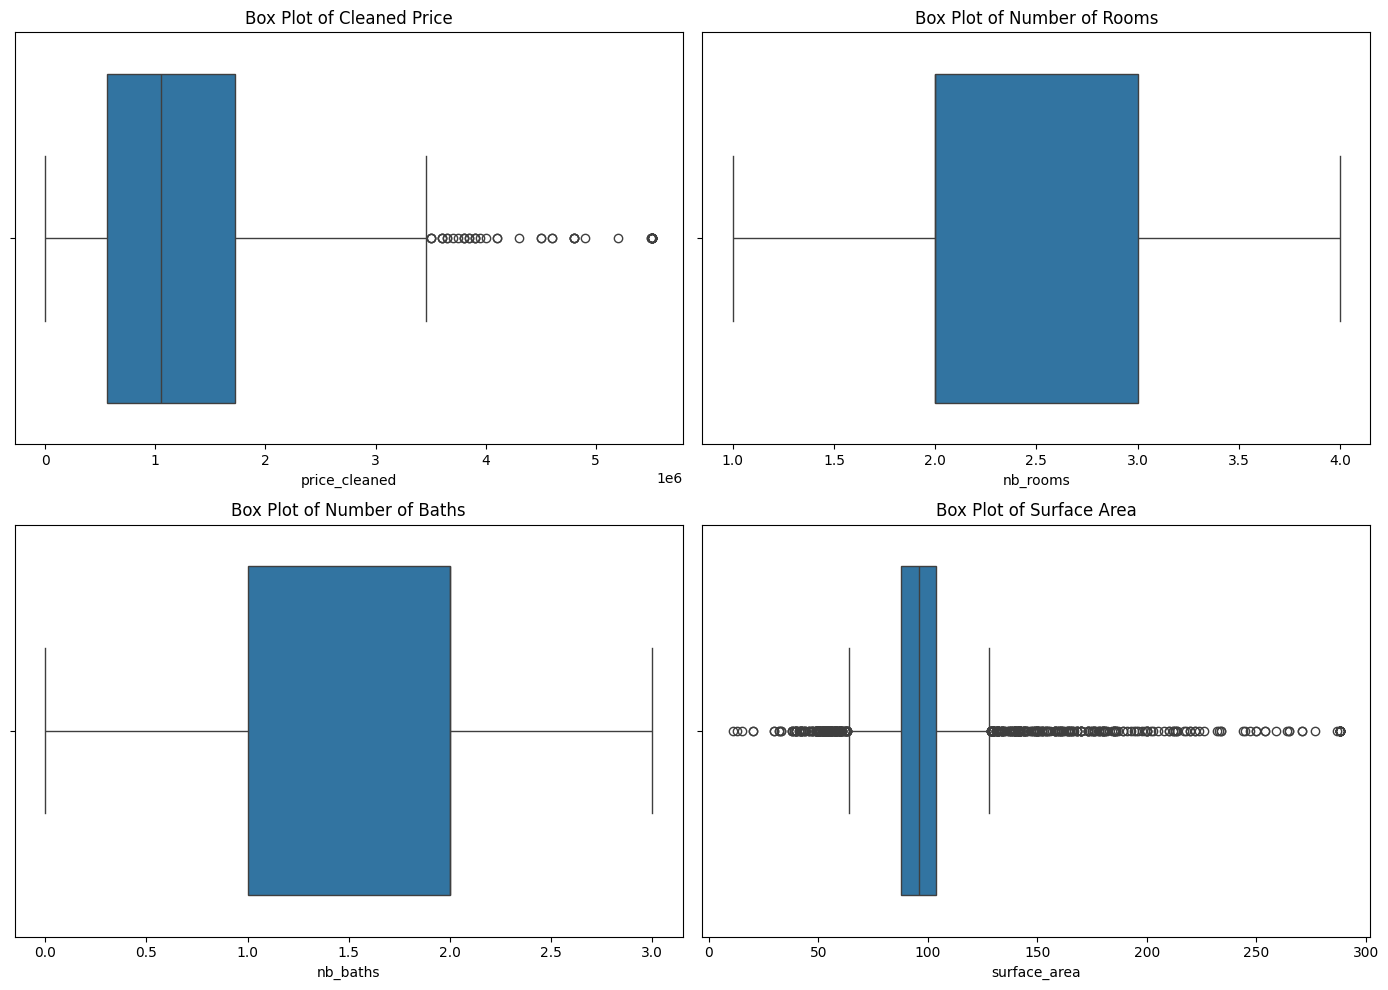

In [16]:
# Visualize the capped data with box plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(x=data['price_cleaned'], ax=axes[0, 0])
axes[0, 0].set_title("Box Plot of Cleaned Price")

sns.boxplot(x=data['nb_rooms'], ax=axes[0, 1])
axes[0, 1].set_title("Box Plot of Number of Rooms")

sns.boxplot(x=data['nb_baths'], ax=axes[1, 0])
axes[1, 0].set_title("Box Plot of Number of Baths")

sns.boxplot(x=data['surface_area'], ax=axes[1, 1])
axes[1, 1].set_title("Box Plot of Surface Area")

plt.tight_layout()
plt.show()

In [17]:
# Step 6: Standardize Numerical Columns for Consistency
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['price_cleaned', 'nb_rooms', 'nb_baths', 'surface_area']] = scaler.fit_transform(
    data[['price_cleaned', 'nb_rooms', 'nb_baths', 'surface_area']]
)

# Final summary of standardized data (optional visualization)
data[['price_cleaned', 'nb_rooms', 'nb_baths', 'surface_area']].describe()

,price_cleaned,nb_rooms,nb_baths,surface_area
count,1.193000e+03,1.760000e+03,1.760000e+03,1.760000e+03
mean,-2.322814e-16,-2.422305e-16,1.211152e-17,-1.150595e-16
std,1.000419e+00,1.000284e+00,1.000284e+00,1.000284e+00
min,-1.290793e+00,-2.075270e+00,-3.228885e+00,-2.279238e+00
25%,-7.281140e-01,-4.270412e-01,-1.380206e+00,-3.473487e-01
50%,-2.357388e-01,-4.270412e-01,4.684719e-01,-1.466329e-01
75%,4.375090e-01,1.221188e+00,4.684719e-01,5.408293e-02
max,4.248694e+00,2.869417e+00,2.317150e+00,4.676317e+00


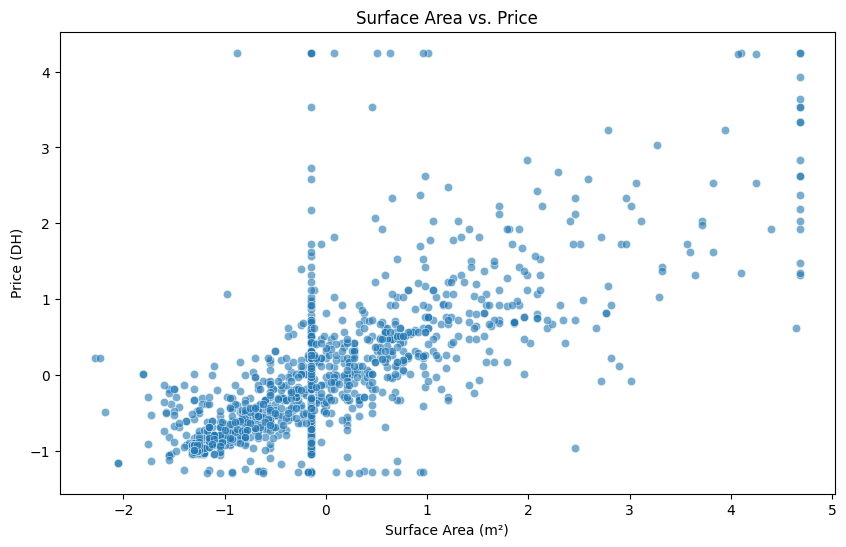

In [20]:
# Plotting Area vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='surface_area', y='price_cleaned', alpha=0.6)
plt.title("Surface Area vs. Price")
plt.xlabel("Surface Area (m²)")
plt.ylabel("Price (DH)")
plt.show()

